In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import glob
from scipy.optimize import curve_fit
import re
import math
import os
import time

import matplotlib.pyplot #

# The lines below are specific to the notebook format
%matplotlib inline
fontsize = 20
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 9),
         'axes.labelsize': fontsize,
         'axes.titlesize': fontsize,
         'xtick.labelsize':fontsize,
         'ytick.labelsize':fontsize}
matplotlib.rcParams.update(params)
plt = matplotlib.pyplot



In [2]:
dr = '/Users/litz/Documents/GitHub/model_KIC9773821/'

mddr = 'S3_mixed_modes/'
#filename = dr + '02_seismo_set.csv'
filename = dr + '02_radial_modes_selected.csv'

df = pd.read_csv(filename, index_col=0)

df.tail()

,csvname,filename,evol_stage,initial_mass,initial_MLT,star_mass,star_age,effective_T,log_g,radius,...,nu_0_31,nu_0_32,nu_0_33,nu_0_34,nu_0_35,nu_0_36,nu_0_37,nu_0_38,nu_0_39,nu_0_40
8344,m2.2Y0.26FeH0.2MLT2.1ov0.018000000000000002dif0,profile1320,3,2.2,2.1,2.194532,0.032853,4946.837907,2.930328,8.403334,...,260.245328,268.484038,276.616734,284.665312,292.651647,300.626339,308.673552,316.825996,325.095873,333.402596
8345,m2.2Y0.26FeH0.2MLT2.1ov0.018000000000000002dif0,profile1377,3,2.2,2.1,2.189527,0.075714,4980.811019,2.929222,8.404439,...,261.619175,269.876912,278.024994,286.081194,294.105786,302.135711,310.255417,318.488219,326.833539,335.222971
8346,m2.2Y0.26FeH0.2MLT2.1ov0.018000000000000002dif0,profile1378,3,2.2,2.1,2.189232,0.077942,4981.868054,2.927222,8.423250,...,260.809219,269.036611,277.154027,285.181204,293.179129,301.187321,309.287881,317.502388,325.825472,334.194648
8347,m2.2Y0.26FeH0.2MLT2.1ov0.018000000000000002dif0,profile1379,3,2.2,2.1,2.188988,0.079766,4983.898679,2.927180,8.423189,...,260.886746,269.115126,277.232648,285.261258,293.260844,301.272738,309.377565,317.597127,325.923726,334.297595
8348,m2.2Y0.26FeH0.2MLT2.1ov0.018000000000000002dif0,profile1380,3,2.2,2.1,2.188741,0.081608,4984.083278,2.924603,8.447740,...,259.789140,267.977035,276.055149,284.045771,292.010166,299.991976,308.069512,316.262612,324.557485,332.902078


In [3]:
np.unique(df.evol_stage)

array([2, 3])

In [4]:
nu_0_n_number = [i for i in range(1,41)]
nu_0_n_text = ['nu_0_%s' % s for s in nu_0_n_number]
E_0_n_text = ['E_0_%s' % s for s in nu_0_n_number]
nu_1_n_number = [i for i in range(-1000,41)]
nu_1_n_text = ['nu_1_%s' % s for s in nu_1_n_number]
E_1_n_text = ['E_1_%s' % s for s in nu_1_n_number]
nu_2_n_number = [i for i in range(-1000,41)]
nu_2_n_text = ['nu_2_%s' % s for s in nu_2_n_number]
E_2_n_text = ['E_2_%s' % s for s in nu_2_n_number]
output_freq_header = nu_0_n_text # + nu_1_n_text + nu_2_n_text
output_E_header = E_0_n_text  # + E_1_n_text + E_2_n_text

sub_df = df.copy()

In [5]:
len(sub_df)

8349

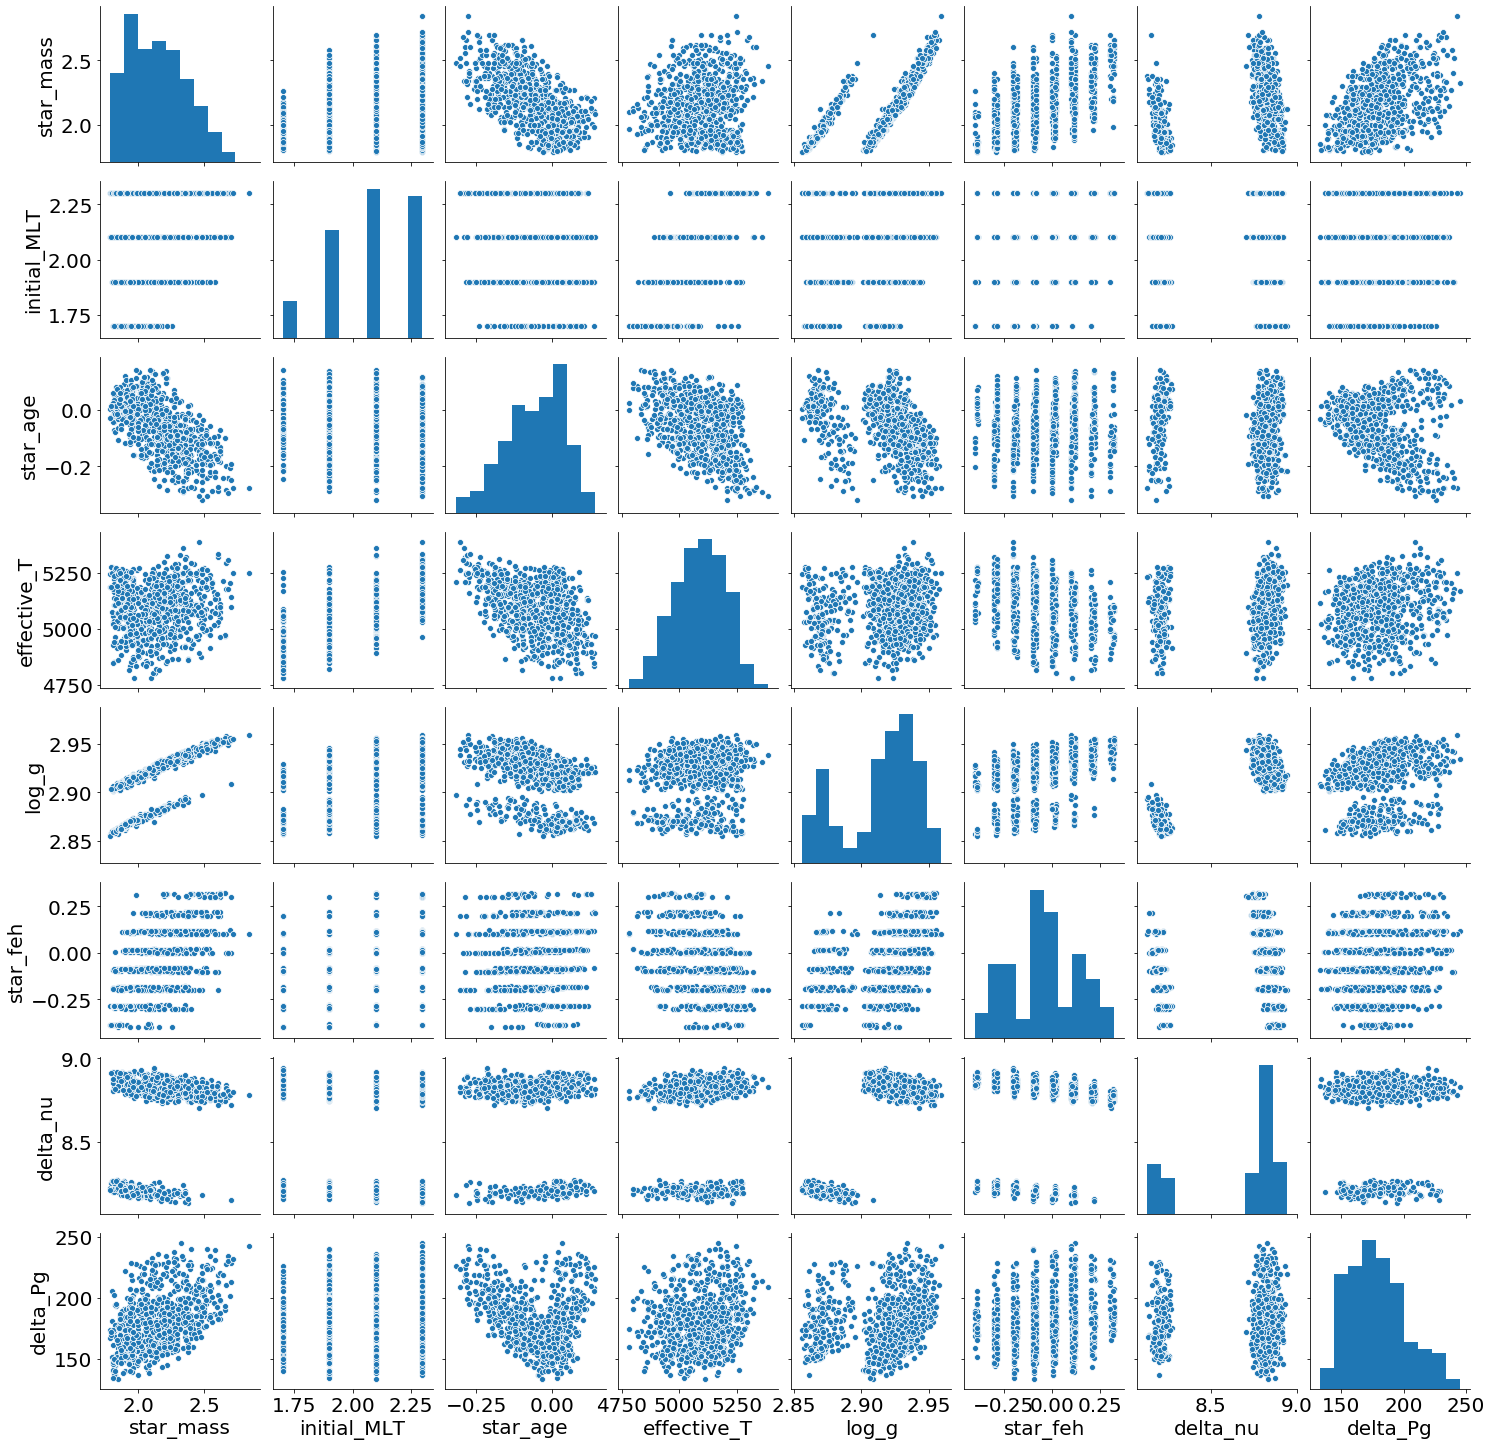

In [6]:
#sub_df.isna().sum()
#sub_df = sub_df.dropna()
plotset = sub_df.sample(frac = 0.1, random_state=1)
sns.pairplot(plotset[['star_mass','initial_MLT','star_age','effective_T','log_g','star_feh',
                      'delta_nu','delta_Pg']])

2   73.592
0   74.587
1   79.114
2   81.565
0   82.508
1   84.97
1   86.11
1   86.982
1   88.291
2   89.27
2   89.419
2   89.57
0   90.302
1   91.10
1   92.66
1   94.102
1   94.974
1   96.413
2   97.536
0   98.454
1  100.03
1  101.80
1  102.933
1  104.26
2  105.768
0  106.613
1  108.401
1  110.335
1  111.406
2  113.692
0  114.687
1  115.76
1  118.124
1  119.368
2  121.9
0  122.910
1  126.653
1  128.074
2  130.616
0  131.431
1  133.7
1  135.5


In [7]:
obs = pd.read_csv('kic-9773821-peaks-id.txt', delim_whitespace=True)
obs

,l,nu
0,2,73.592
1,0,74.587
2,1,79.114
3,2,81.565
4,0,82.508
5,1,84.970
6,1,86.110
7,1,86.982
8,1,88.291
9,2,89.270


[ 8.10990476 74.30183333]
0.0013729111517348602 0.024025945575799748


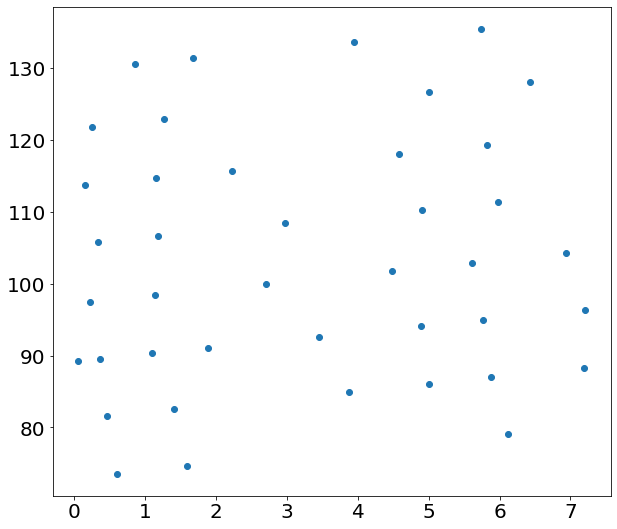

In [8]:
#set up star 
#observations

obs_teff = 5124.0
obs_teff_e = 194.0
obs_logg = 2.650 
obs_logg_e = 0.39
obs_feh =  -0.09
obs_feh_e = 0.16


obs_nu0 = obs['nu'][obs.l == 0].to_numpy()
obs_n0 = np.array([0,1,2,3,4,5,6,7])
obs_nu0_e = np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])

def line(x, a, b):
    return a * x + b

popt, pcov = curve_fit(line, obs_n0, obs_nu0, sigma = obs_nu0_e)

print(popt)
print(pcov[0,0], pcov[1,1])

#fig, ax = plt.subplots()
#ax.errorbar(obs_n0, obs_nu0, c = 'k', yerr = obs_nu0_e )
#ax.plot(obs_n0, (popt[1] + popt[0]*obs_n0), c = 'b')

obs_delta_nu = 8.10990476
obs_delta_nu_e = 0.2#*1.0
obs_nu_max = 102.06
obs_nu_max_e = 5.0
#obs_delta_Pg = 194.0
#obs_delta_Pg_e = 5.0

plt.scatter(obs.nu.to_numpy() % obs_delta_nu, obs.nu.to_numpy())

In [9]:
obs_nu0 = obs.nu[obs.l == 0].to_numpy()
obs_n0 = np.array([0,1,2,3,4,5,6,7])
obs_nu0_e = obs_n0*0.0 + 0.1

obs_nu1 = obs.nu[obs.l == 1].to_numpy()
obs_nu1_e = obs_nu1*0.0 + 0.3

obs_nu2 = obs.nu[obs.l == 2].to_numpy()
obs_nu2_e = obs_nu2*0.0 + 0.2

print(obs_nu1_e)

[0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3]


(0.0, 8.10990476)

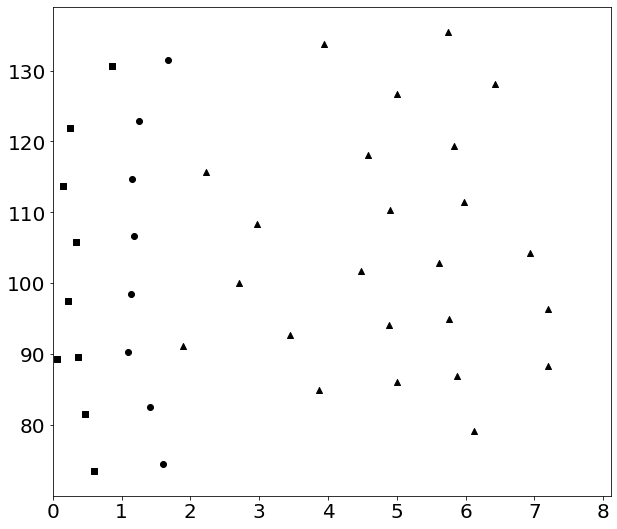

In [10]:
plt.scatter((obs_nu0 % obs_delta_nu), obs_nu0, c = 'k',marker='o')
plt.scatter((obs_nu1 % obs_delta_nu), obs_nu1, c = 'k',marker='^')
plt.scatter((obs_nu2 % obs_delta_nu), obs_nu2, c = 'k',marker='s')
plt.xlim([0.0, obs_delta_nu])

In [11]:
def mle(model, obs, obs_e):
    #lk = 1.0/ (2.0*3.14159*obs_e**2.0)**(0.5) * 
    lk = np.exp( 0.0 - (model - obs)**2.0/2.0/obs_e**2.0 )
    return lk

def linear(x, a, b):
    return a * x + b

def ball_two_term(X, a1, a3):
    nu0, nu, inertia = X
    
    cubic = (a3*nu**3.0)/inertia
    
    inverse = 0.0
    
    if a1 != 0: inverse = a1*nu**(-1.0)/inertia
    
    return nu0 + inverse + cubic
    
    
def kb95(X, a, b):
    x1, x2 = X
    return x1 - a*x2**b

def correct_sc_kb95(obs_freq, model_freq, nu_max, a, b):
    new_model_freq = model_freq + a*(model_freq/nu_max)**b
    return new_model_freq

def surface_correction(obs_freq, obs_freq_e, model_freq, model_inertia, nu_max, sc_method):
    if (sc_method == 'kb95'):
        #kb 95 nu_obs - nu_model = a*(nu_obs/nu_max)**b        
        popt, pcov = curve_fit(kb95, (obs_freq, obs_freq/nu_max), model_freq)
        a, b = popt
        a_e, b_e = pcov
        model_freq_c = correct_sc_kb95(obs_freq, model_freq, nu_max, a, b)
    if (sc_method == 'bg2'):
        #Ball&Gizon 2 terms: obs - model = (a1*(nu/nu_ac)**(-1) + a3*(nu/nu_ac)**(3))/inertia
        # model = obs - (a1*(nu/nu_ac)**(-1) + a3*(nu/nu_ac)**(3))/inertia
        popt, pcov = curve_fit(ball_two_term, (model_freq, model_freq/1.6/nu_max, model_inertia), obs_freq, sigma = obs_freq_e)
        a, b = popt
        a_e, b_e = pcov
        model_freq_c = ball_two_term((model_freq,model_freq/1.6/nu_max, model_inertia), a, b)
    return a, b, model_freq_c  

def seismo_lk(obs_freq,obs_freq_e,mode_freq, n):
    chi2 = np.mean(((obs_freq - mode_freq)**2.0/2.0/obs_freq_e**2.0))
    lk = math.exp(0.0 - chi2)
    return lk

def get_chi2(model, obs, obs_e):
    chi2 = (model - obs)**2.0/2.0/obs_e**2.0
    return chi2

def fit_two_sets(obs, obs_e, model, model_x = None):
    find_model = np.full(len(obs), 0.0)
    find_model_x = np.full(len(obs), 0.0)
    chi2 = np.full(len(obs), 9999.0)
    for i in range(len(obs)):
        nuse = np.argmin(np.abs(model - obs[i]))
        find_model[i] = model[nuse]
        find_model_x[i] = model_x[nuse]
        chi2[i] = get_chi2(model[nuse], obs[i], obs_e[i])
    return find_model, find_model_x, chi2

def prob(para, lk, start, end, binsize, shift):
    n = int((end - start + shift)/binsize)
    x = np.zeros(n)
    y = np.zeros(n)
    for i in range(n):
        x[i] = start + shift + i*binsize + 0.5*binsize
        yindex = np.where((para >= (start + shift + i*binsize)) &
                          (para < (start + shift + (i+1)*binsize))
                         )
        yyy = yindex[0]
        if (len(yyy) > 0):
            y[i] = np.sum(lk[yyy])
    return x, y

def prob(para, lk, start, end, binsize, shift):
    n = int((end - start + shift)/binsize)
    x = np.zeros(n)
    y = np.zeros(n)
    for i in range(n):
        x[i] = start + shift + i*binsize + 0.5*binsize
        yindex = ((para >= (start + shift + i*binsize)) &
                          (para < (start + shift + (i+1)*binsize))
                         )
        y[i] = np.sum(lk[yindex])
    return x, y

def gaus(x):
    return a*math.exp(-(x-mu)**2/(2*sigma**2))

# fit with Models

8349


Text(0, 0.5, '$\\Delta\\nu$')

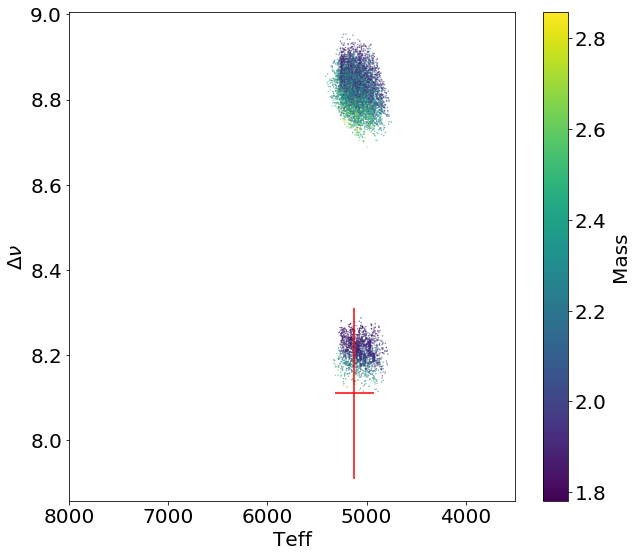

In [12]:
starset = df
print(len(starset))
fig, ax = plt.subplots()
#ax.scatter(plotset['effective_T'],plotset['delta_nu_fit'], c = 'k', s = 0.1)
s = ax.scatter(starset['effective_T'],starset['delta_nu'], c = starset['star_mass'], s = 0.1)
ax.errorbar(obs_teff, obs_delta_nu, xerr = obs_teff_e, yerr = obs_delta_nu_e, c = 'r')
plt.colorbar(s,ax=ax).set_label('Mass')
ax.set_xlim([8000,3500])
#ax.set_ylim([8.0,0.])
ax.set_xlabel("Teff")
ax.set_ylabel(r"$\Delta\nu$")

In [13]:
starset['lk_effective_T'] = mle(starset['effective_T'], obs = obs_teff, obs_e = obs_teff_e)
starset['lk_log_g'] = mle(starset['log_g'], obs = obs_logg, obs_e = obs_logg_e)
starset['lk_feh'] = mle(starset['star_feh'], obs = obs_feh, obs_e = obs_feh_e)
#starset['lk_nu_max'] =  mle(starset['new_nu_max'], obs = obs_nu_max, obs_e = obs_nu_max_e)
#starset['lk_delta_nu_fit'] = mle(starset['delta_nu_fit'], obs = obs_delta_nu, obs_e = obs_delta_nu_e)
#starset['lk_delta_Pg'] = mle(starset['delta_Pg'], obs = obs_delta_Pg, obs_e = obs_delta_Pg_e)

starset['lk_total'] = starset['lk_effective_T']*starset['lk_feh']*starset['lk_log_g']#*starset['lk_nu_max']#*starset['lk_delta_Pg']
#starset['lk_total'] = starset['lk_total']



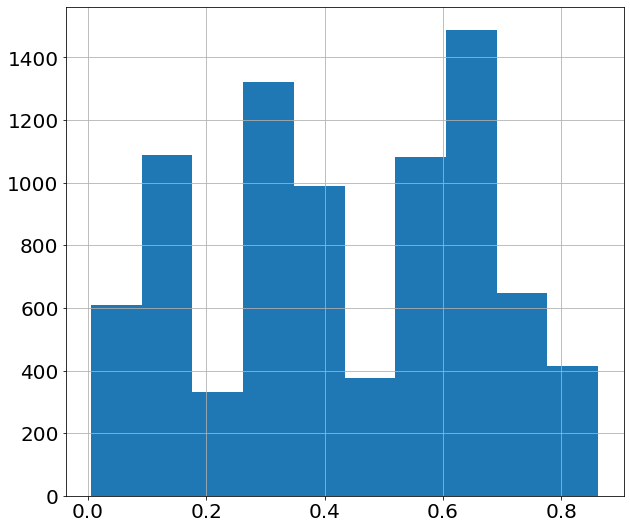

In [14]:
starset['lk_total'].hist()

Text(0.5, 1.0, 'Models for KIC KIC 9773821')

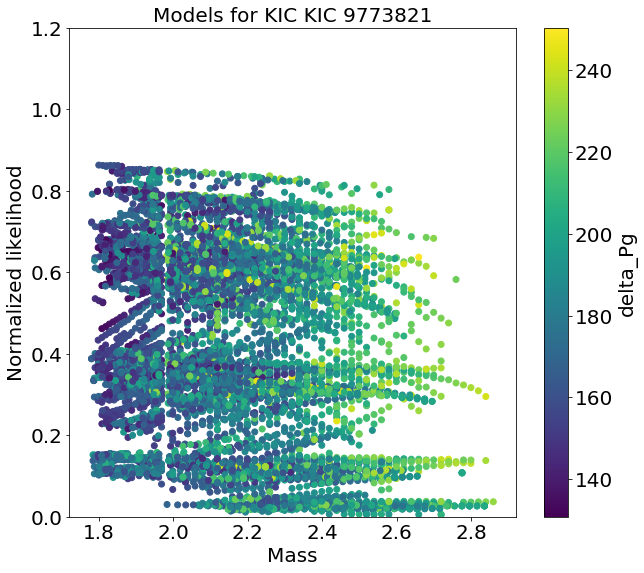

In [15]:
fig, ax = plt.subplots()
s = ax.scatter(starset['star_mass'],starset['lk_total'], c = starset['delta_Pg'])
ax.set_ylim([1.5,3.5])
ax.set_ylim([0.000,1.2])
plt.xlabel('Mass')
plt.ylabel('Normalized likelihood')
plt.colorbar(s,ax=ax).set_label('delta_Pg')
plt.title('Models for KIC KIC 9773821')

#Fit radial modes 

In [16]:
starset_seismo = []
starset_seismo = starset[(starset.delta_nu>=0.0001)]
#starset_seismo = starset_seismo.sample(frac = 0.5, random_state = 100)
#starset_seismo.index = range(len(starset_seismo))
starset_seismo['lk_l0'] = starset_seismo['star_mass']*0.00
starset_seismo['surf_a1'] = starset_seismo['star_mass']*0.00 + 9999.0
starset_seismo['surf_a3'] = starset_seismo['star_mass']*0.00 + 9999.0
starset_seismo['surf_a'] = starset_seismo['star_mass']*0.00 + 9999.0
starset_seismo['surf_b'] = starset_seismo['star_mass']*0.00 + 9999.0
starset_seismo

,csvname,filename,evol_stage,initial_mass,initial_MLT,star_mass,star_age,effective_T,log_g,radius,...,nu_0_40,lk_effective_T,lk_log_g,lk_feh,lk_total,lk_l0,surf_a1,surf_a3,surf_a,surf_b
0,m2.16Y0.26FeH0.1MLT2.1ov0.018000000000000002dif0,profile957,2,2.16,2.1,2.158977,0.004463,4982.208533,2.926391,8.372844,...,332.035682,0.765600,0.777925,0.471778,0.280982,0.0,9999.0,9999.0,9999.0,9999.0
1,m2.16Y0.26FeH0.1MLT2.1ov0.018000000000000002dif0,profile1380,3,2.16,2.1,2.150430,0.042814,5030.000583,2.928081,8.340017,...,335.909451,0.889242,0.775533,0.433749,0.299129,0.0,9999.0,9999.0,9999.0,9999.0
2,m2.16Y0.26FeH0.1MLT2.1ov0.018000000000000002dif0,profile1381,3,2.16,2.1,2.150099,0.045431,5030.935661,2.925403,8.365120,...,334.498842,0.891311,0.779321,0.433749,0.301289,0.0,9999.0,9999.0,9999.0,9999.0
3,m2.22Y0.28FeH0.1MLT2.1ov0.018000000000000002dif0,profile1049,2,2.22,2.1,2.219000,-0.081337,5036.536515,2.931526,8.438406,...,333.962250,0.903364,0.770634,0.480271,0.334347,0.0,9999.0,9999.0,9999.0,9999.0
4,m2.12Y0.32FeH-0.2MLT1.9ov0.018000000000000002dif0,profile941,2,2.12,1.9,2.118958,-0.223187,5190.835782,2.921549,8.341250,...,337.124415,0.942382,0.784740,0.789639,0.583957,0.0,9999.0,9999.0,9999.0,9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8344,m2.2Y0.26FeH0.2MLT2.1ov0.018000000000000002dif0,profile1320,3,2.20,2.1,2.194532,0.032853,4946.837907,2.930328,8.403334,...,333.402596,0.659039,0.772341,0.158969,0.080916,0.0,9999.0,9999.0,9999.0,9999.0
8345,m2.2Y0.26FeH0.2MLT2.1ov0.018000000000000002dif0,profile1377,3,2.20,2.1,2.189527,0.075714,4980.811019,2.929222,8.404439,...,335.222971,0.761560,0.773914,0.158969,0.093693,0.0,9999.0,9999.0,9999.0,9999.0
8346,m2.2Y0.26FeH0.2MLT2.1ov0.018000000000000002dif0,profile1378,3,2.20,2.1,2.189232,0.077942,4981.868054,2.927222,8.423250,...,334.194648,0.764617,0.776750,0.158969,0.094414,0.0,9999.0,9999.0,9999.0,9999.0
8347,m2.2Y0.26FeH0.2MLT2.1ov0.018000000000000002dif0,profile1379,3,2.20,2.1,2.188988,0.079766,4983.898679,2.927180,8.423189,...,334.297595,0.770461,0.776810,0.158969,0.095143,0.0,9999.0,9999.0,9999.0,9999.0


1000
2000
3000
4000
5000
6000
6629
35.8616840839386


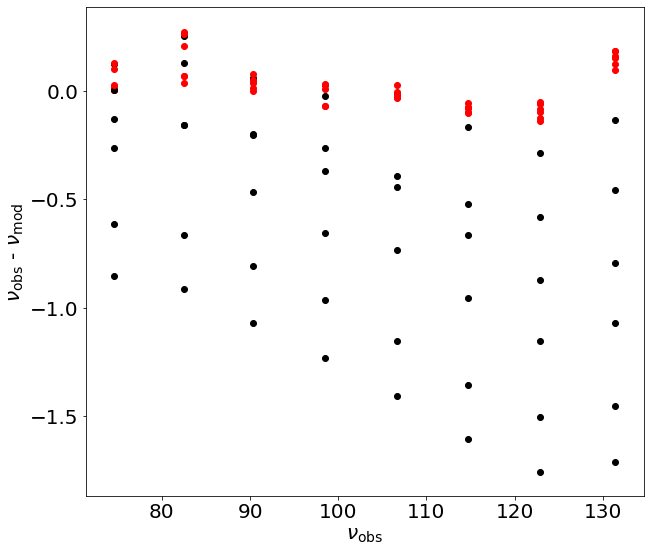

In [17]:
start = time.time()
#
all_freq = obs_nu0
all_freq_e = obs_nu0_e
all_model_n = obs_n0
all_nu_max = obs_nu_max
all_delta_nu = obs_delta_nu
#
column_l_prefix = 'nu_0_'
column_E_prefix = 'E_0_'
marking_mode = obs_nu0[0]
marking_mode_n = 0
fairfit_marking_mode = 0.2*obs_delta_nu
fig, ax = plt.subplots()

t = 0

for index, row in starset_seismo.iterrows():
    
    temp = (row[output_freq_header]- marking_mode).abs().astype('float64')
    
    marking_index = temp.idxmin()     
    marking_abs_min = temp.min()
    #
    if (marking_abs_min<= fairfit_marking_mode ):
        n_start = re.findall('\d+', marking_index)
        n_for_fit = all_model_n + int(n_start[1]) - marking_mode_n
        column_for_fit_nu = [column_l_prefix + '%s' % s for s in n_for_fit]
        column_for_fit_E = [column_E_prefix + '%s' % s for s in n_for_fit]
        
        if ( (np.median(all_freq -row[column_for_fit_nu].to_numpy()) >0.0) or 
             (np.abs(np.median(all_freq -row[column_for_fit_nu].to_numpy()) >0.25*obs_delta_nu))
           ):
            continue
        
        t = t+1
        
        #surface correction        
        surf_a1, surf_a3, new_mode_freq = surface_correction(all_freq, all_freq_e, row[column_for_fit_nu].to_numpy(), None, all_nu_max, 'kb95')
        #
        if surf_a3 <= 1.0e99:
            xxx = seismo_lk(all_freq, all_freq_e, new_mode_freq, len(all_freq))
            starset_seismo.loc[index,'lk_l0'] = xxx
            starset_seismo.loc[index,'surf_a1'] = surf_a1
            starset_seismo.loc[index,'surf_a3'] = surf_a3
            if (t % 1000 ==0):
                print(t)
                plt.scatter(all_freq , all_freq -  row[column_for_fit_nu].to_numpy(), c ='k')
                plt.scatter(all_freq , all_freq -  new_mode_freq, c = 'r')
plt.xlabel(r'$\nu_{\rm obs}$')
plt.ylabel(r'$\nu_{\rm obs}$ - $\nu_{\rm mod}$')

print(t)

end = time.time()
print(end - start)


0.8626766854291287
0.8470519136633362


,csvname,filename,evol_stage,initial_mass,initial_MLT,star_mass,star_age,effective_T,log_g,radius,...,lk_log_g,lk_feh,lk_total,lk_l0,surf_a1,surf_a3,surf_a,surf_b,lk_l0_1st,lk_new
0,m2.16Y0.26FeH0.1MLT2.1ov0.018000000000000002dif0,profile957,2,2.16,2.1,2.158977,0.004463,4982.208533,2.926391,8.372844,...,0.777925,0.471778,0.280982,0.603148,-0.060258,5.168958,9999.0,9999.0,0.603148,0.276048
1,m2.16Y0.26FeH0.1MLT2.1ov0.018000000000000002dif0,profile1380,3,2.16,2.1,2.150430,0.042814,5030.000583,2.928081,8.340017,...,0.775533,0.433749,0.299129,0.768901,-0.877408,1.771616,9999.0,9999.0,0.768901,0.374638
2,m2.16Y0.26FeH0.1MLT2.1ov0.018000000000000002dif0,profile1381,3,2.16,2.1,2.150099,0.045431,5030.935661,2.925403,8.365120,...,0.779321,0.433749,0.301289,0.746103,-0.427438,2.532895,9999.0,9999.0,0.746103,0.366155
3,m2.22Y0.28FeH0.1MLT2.1ov0.018000000000000002dif0,profile1049,2,2.22,2.1,2.219000,-0.081337,5036.536515,2.931526,8.438406,...,0.770634,0.480271,0.334347,0.791918,-0.555309,1.866038,9999.0,9999.0,0.791918,0.431281
4,m2.12Y0.32FeH-0.2MLT1.9ov0.018000000000000002dif0,profile941,2,2.12,1.9,2.118958,-0.223187,5190.835782,2.921549,8.341250,...,0.784740,0.789639,0.583957,0.515878,-0.784723,2.749714,9999.0,9999.0,0.515878,0.490694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,m2.54Y0.26FeH0.0MLT1.9ov0.018000000000000002dif0,profile1090,2,2.54,1.9,2.538970,-0.220558,5099.113624,2.944717,8.890270,...,0.751616,0.853617,0.636335,0.534650,-0.691964,2.480366,9999.0,9999.0,0.534650,0.554164
6166,m2.2Y0.26FeH0.2MLT2.1ov0.018000000000000002dif0,profile1320,3,2.20,2.1,2.194532,0.032853,4946.837907,2.930328,8.403334,...,0.772341,0.158969,0.080916,0.766828,-0.230738,2.953494,9999.0,9999.0,0.766828,0.101068
6167,m2.2Y0.26FeH0.2MLT2.1ov0.018000000000000002dif0,profile1377,3,2.20,2.1,2.189527,0.075714,4980.811019,2.929222,8.404439,...,0.773914,0.158969,0.093693,0.789087,-0.712790,1.829486,9999.0,9999.0,0.789087,0.120425
6168,m2.2Y0.26FeH0.2MLT2.1ov0.018000000000000002dif0,profile1378,3,2.20,2.1,2.189232,0.077942,4981.868054,2.927222,8.423250,...,0.776750,0.158969,0.094414,0.770293,-0.383634,2.492350,9999.0,9999.0,0.770293,0.118461


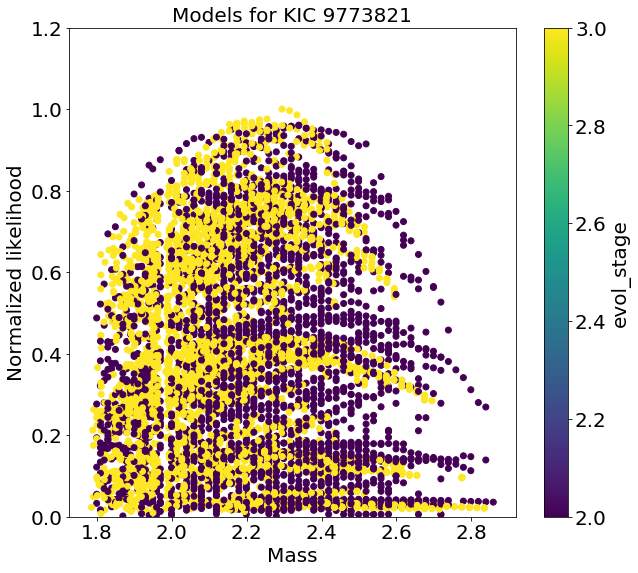

In [18]:
#starset_seismo['lk_global'] = starset_seismo['lk_effective_T']*starset_seismo['lk_log_g']*starset_seismo['lk_feh']
print(np.max(starset_seismo['lk_total']))
#starset_seismo['lk_global'] = starset_seismo['lk_global']#/np.max(starset_seismo['lk_global'])

#starset_seismo['lk_delta_Pg'] = starset_seismo['lk_delta_Pg']#/np.max(starset_seismo['lk_delta_Pg'])

print(np.max(starset_seismo['lk_l0']))

starset_seismo['lk_l0_1st'] = starset_seismo['lk_l0']#/np.max(starset_seismo['lk_l0'])

starset_seismo['lk_new']  = starset_seismo['lk_total']*starset_seismo['lk_l0_1st']#*starset_seismo['lk_delta_Pg']

starset_seismo['lk_new'] = starset_seismo['lk_new']/np.max(starset_seismo['lk_new'])

mixed_sample = starset_seismo.loc[ (starset_seismo['lk_new'] >= 0.0001)]
mixed_sample.index = range(len(mixed_sample ))
mixed_sample.to_csv(dr + '03_radial_modes_fitting.csv')

fig, ax = plt.subplots()
s = ax.scatter(mixed_sample['star_mass'],mixed_sample['lk_new'], c = mixed_sample['evol_stage'])
ax.set_ylim([1.5,3.5])
ax.set_ylim([0.000, 1.2])
plt.xlabel('Mass')
plt.ylabel('Normalized likelihood')
plt.colorbar(s,ax=ax).set_label('evol_stage')
plt.title('Models for KIC 9773821')

mixed_sample 

Text(0.5, 1.0, 'Models for KIC 9773821')

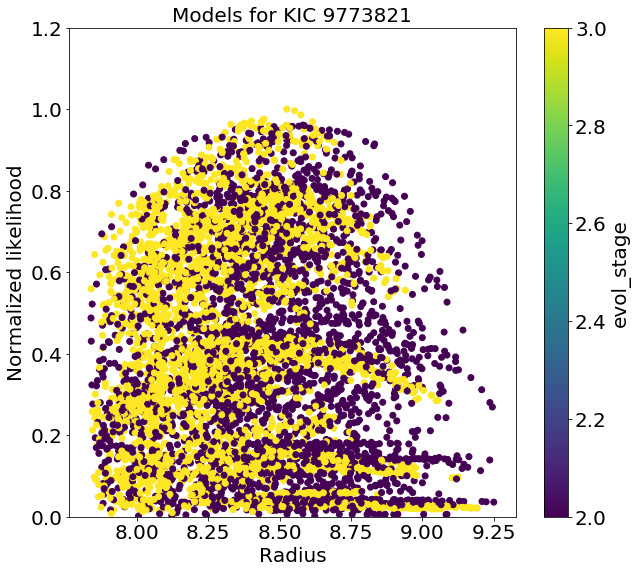

In [19]:
fig, ax = plt.subplots()
s = ax.scatter(mixed_sample['radius'],mixed_sample['lk_new'], c = mixed_sample['evol_stage'])
ax.set_ylim([1.5,3.5])
ax.set_ylim([0.000, 1.2])
plt.xlabel('Radius')
plt.ylabel('Normalized likelihood')
plt.colorbar(s,ax=ax).set_label('evol_stage')
plt.title('Models for KIC 9773821')

px0, py0 = prob(starset_seismo['star_mass'], starset_seismo['lk_new'], 1.2, 2.19, 0.02, 0.0)

py_max = np.max( np.concatenate((py1, py2), axis = 0) )
print(py_max)

plt.plot(px0, py0/np.max(py0), c = 'k',label='All')
plt.scatter(px0,py0/np.max(py0), c = 'k')

plt.legend()
plt.title(r'Models for KIC 9773821 (Teff + logg + Fe/H + Delta_Pg + radial modes)')
plt.xlabel('Mass')
plt.ylabel('Normalized likelihood')
plt.show()
#popt,pcov = curve_fit(gaus,px,py)
#plt.plot(px,'ro:',label='fit')

px0, py0 = prob(starset_seismo['star_age'], starset_seismo['lk_new'], 0.8, 3.0, 0.02, 0.0)

py_max = np.max( np.concatenate((py1, py2), axis = 0) )
print(py_max)

plt.plot(px0, py0/np.max(py0), c = 'k',label='All')
plt.scatter(px0,py0/np.max(py0), c = 'k')

plt.legend()
plt.title(r'Models for KIC 9773821 (Teff + logg + Fe/H + Delta_Pg + radial modes)')
plt.xlabel('Age (Gyr)')
plt.ylabel('Normalized likelihood')
plt.show()
#popt,pcov = curve_fit(gaus,px,py)
#plt.plot(px,'ro:',label='fit')

px0, py0 = prob(starset_seismo['log_g'], starset_seismo['lk_new'], 2.50, 2.65, 0.002, 0.0)

py_max = np.max( np.concatenate((py1, py2), axis = 0) )
print(py_max)

plt.plot(px0, py0/np.max(py0), c = 'k',label='All')
plt.scatter(px0,py0/np.max(py0), c = 'k')

plt.legend()
plt.title(r'Models for KIC 9773821 (Teff + logg + Fe/H + Delta_Pg + radial modes)')
plt.xlabel(r'$\log g$')
plt.ylabel('Normalized likelihood')
plt.show()

In [20]:
np.unique(starset_seismo.evol_stage)

array([2, 3])

In [21]:
obs_nu1_e = obs_nu1*0.0 + 0.1
obs_nu2_e = obs_nu2*0.0 + 0.1

In [22]:
starset_seismo['lk_l1'] = starset_seismo['lk_l0']*0.0
starset_seismo['lk_l2'] = starset_seismo['lk_l0']*0.0

t = 0
for index, row in starset_seismo.iterrows():
    osc1file = dr + mddr + 'S3_mixed_modes/'+ row['csvname'] + '/' + row['filename'] + '.data.GYRE.osc1'
    osc2file = dr + mddr + 'S3_mixed_modes_l2/'+ row['csvname'] + '/' + row['filename'] + '.data.GYRE.osc1'
    if ((os.path.isfile(osc1file)) & (os.path.isfile(osc2file))):
        t = t + 1
        
        model_nu0 = row[output_freq_header]
        
        sl, snp, snu, sE = np.loadtxt(osc1file, skiprows=6, usecols=(0,1,4,6), unpack=True)
        id1 = (sl == 1)
        
        
        model_p1 = snp[id1]
        model_nu1 = snu[id1]
        model_E1 = sE[id1]
        
        
        sl, snp, snu, sE = np.loadtxt(osc2file, skiprows=6, usecols=(0,1,4,6), unpack=True)
        id2 = (sl == 2)
        model_p2= snp[id2]
        model_nu2 = snu[id2]
        model_E2 = sE[id2]
        
        ######## only fit the most p-like modes ###
        
        #np1 = np.unique(model_p1)
        #mm_nu1 = np1*0.00
        #mm_E1 = np1*0.00
        #for j in range(len(np1)):
        #    nuse = (model_p1 == np1[j])
        #    nplike = model_E1[nuse].argmin()
        #    mm_nu1[j] = model_nu1[nuse][nplike]
        #    mm_E1[j] = model_E1[nuse][nplike]
                
        #np2 = np.unique(model_p2)
        #mm_nu2 = np2*0.00
        #mm_E2 = np2*0.00
        #for j in range(len(np2)):
        #    nuse = (model_p2 == np2[j])
        #    nplike = model_E2[nuse].argmin()
        #    mm_nu2[j] = model_nu2[nuse][nplike]
        #    mm_E2[j] = model_E2[nuse][nplike]
        
        #model_p1 = np1
        #model_nu1 = mm_nu1
        #model_E1 = mm_E1
        
        #model_p2= np2
        #model_nu2 = mm_nu2
        #model_E2 = mm_E2
        
        ##### end of only fit the most p-like modes###
        
        
        #find_nu0, lk0 = fit_two_sets(obs_nu0, obs_nu0_e, model_nu0)
        find_nu1, find_E1, lk1 = fit_two_sets(obs_nu1, obs_nu1_e, model_nu1, model_E1)
        find_nu2, find_E2, lk2 = fit_two_sets(obs_nu2, obs_nu2_e, model_nu2, model_E2)

        obs_nu = np.concatenate((obs_nu1, obs_nu2))   
        obs_nu_e = np.concatenate((obs_nu1_e, obs_nu2_e))                                       
        find_nu = np.concatenate((find_nu1, find_nu2))
        find_E = np.concatenate((find_E1, find_E2))
            
        a1, a3, find_nu_c = surface_correction(obs_nu, obs_nu_e, find_nu, find_E, obs_nu_max, 'bg2')
        starset_seismo.loc[index,'surf_a1'] = a1
        starset_seismo.loc[index,'surf_a3'] = a3        
                                        
                                        
        tt0, tt1, chi2 = fit_two_sets(obs_nu, obs_nu_e, find_nu, find_E)
        
        #nn0 = len(obs_nu0)
        nn1 = len(obs_nu1)  
        nn2 = len(obs_nu2)
        
        starset_seismo.loc[index,'lk_l1'] = np.exp(-np.mean(chi2[0:(nn1-1)]))
        starset_seismo.loc[index,'lk_l2'] = np.exp(-np.mean(chi2[nn1:(nn1+nn2-1)]))
        
        if t % 1000 ==0: 
            print(t,starset_seismo.loc[index,['lk_l0','lk_l1','lk_l2']])
t

1000 lk_l0       0.707577
lk_l1    0.000183514
lk_l2       0.355881
Name: 1210, dtype: object
2000 lk_l0       0.597908
lk_l1    0.000155597
lk_l2     0.00383479
Name: 2434, dtype: object
3000 lk_l0       0.731595
lk_l1    0.000100366
lk_l2      0.0437634
Name: 3665, dtype: object
4000 lk_l0       0.564389
lk_l1    8.38744e-07
lk_l2      0.0125823
Name: 5008, dtype: object
5000 lk_l0      0.833481
lk_l1    0.00417146
lk_l2      0.596942
Name: 7313, dtype: object


5856

In [23]:
np.max(starset_seismo['lk_l1'])  #was 0.26

0.63788519936119

In [24]:
starset_mm = starset_seismo[starset_seismo['lk_l1'] > 0.00001]
starset_mm = starset_mm.dropna()
starset_mm.index = range(len(starset_mm))

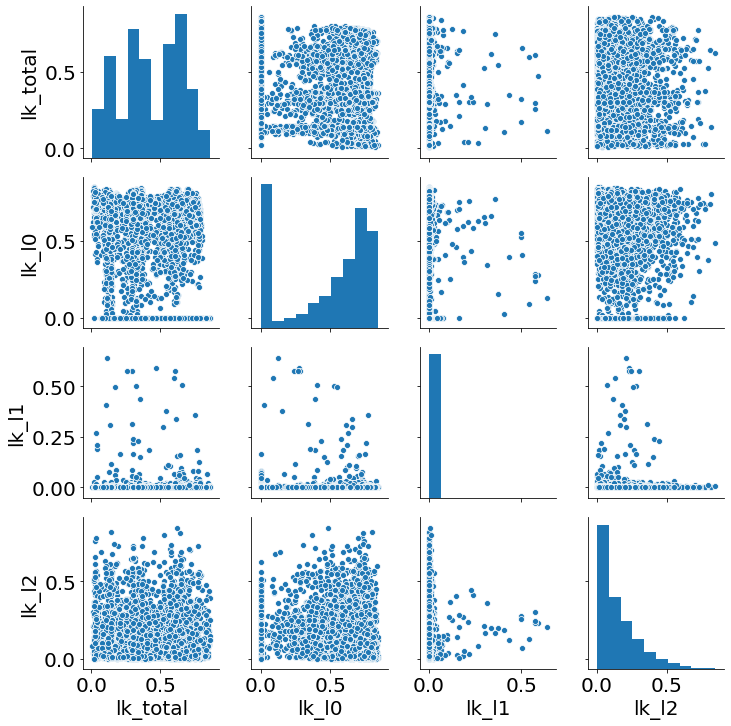

In [25]:
sns.pairplot(starset_mm[['lk_total','lk_l0','lk_l1','lk_l2']])

In [26]:
#starset_mm[['lk_global', 'lk_l0', 'lk_l1']] #= starset_seismo['lk_new']/np.max(starset_seismo['lk_new'])

print(np.max(starset_mm['lk_total']), np.max(starset_mm['lk_l0']), np.max(starset_mm['lk_l1']),np.max(starset_mm['lk_l2']))

0.8626766854291287 0.8470519136633362 0.63788519936119 0.8482647715513393


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, 'Models for KIC 9773821')

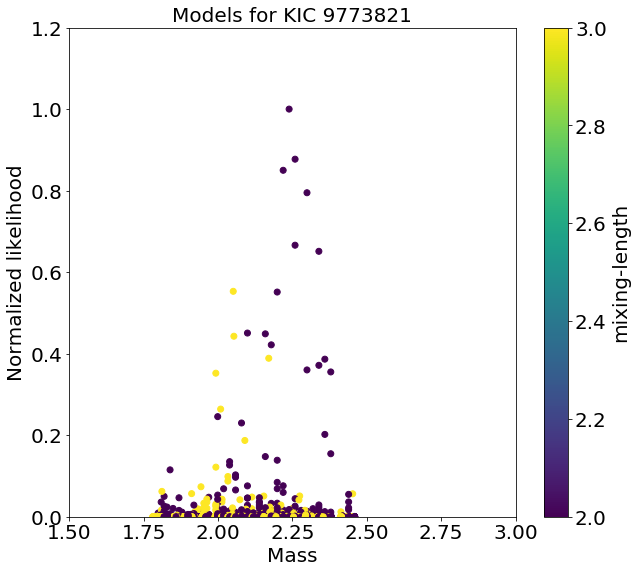

In [27]:
starset_mm['lk_new']  = starset_mm['lk_total']*starset_mm['lk_l0']*starset_mm['lk_l1']*starset_mm['lk_l2']

#starset_mm['lk_new']  = starset_mm['lk_global']/np.max(starset_mm['lk_global'])*starset_mm['lk_l0']/np.max(starset_mm['lk_l0'])*starset_mm['lk_l1']/np.max(starset_mm['lk_l1'])

starset_mm['lk_new'][(starset_mm['lk_new'].argmax())] = 0

starset_mm['lk_new'] = starset_mm['lk_new']/np.max(starset_mm['lk_new'])


fig, ax = plt.subplots()
s = ax.scatter(starset_mm['star_mass'],starset_mm['lk_new'], c = starset_mm['evol_stage'])
ax.set_xlim([1.5,3.0])
ax.set_ylim([0.000, 1.2])
plt.xlabel('Mass')
plt.ylabel('Normalized likelihood')
plt.colorbar(s,ax=ax).set_label('mixing-length')
plt.title('Models for KIC 9773821')

rgb [2.08 2.22 2.34]
rc [2.   2.06 2.18]
star_mass 2.1999999999999997 0.10000000000000009 0.18000000000000016
rgb [-0.235 -0.175 -0.065]
rc [-0.035  0.035  0.065]
star_age -0.12499999999999997 0.16 0.11000000000000001


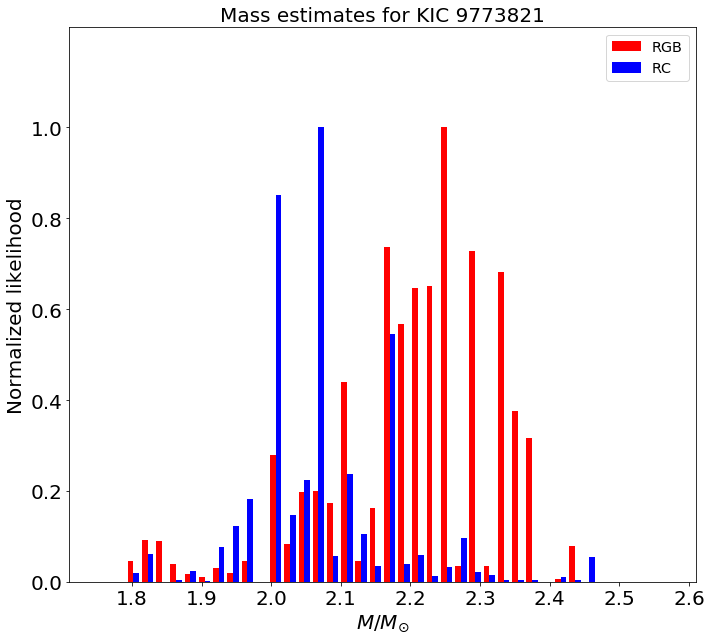

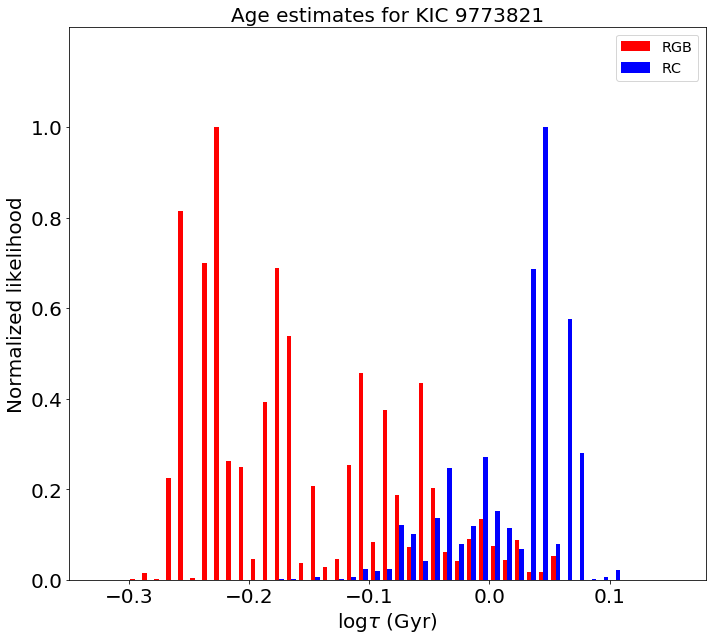

In [28]:
def prob_dist(df, xcolumn, ycolumn, start, end, size, ax):
    
    n1 = df.evol_stage ==2
    n2 = df.evol_stage ==3
    
    nbins = int((end - start)/size)

    px0, py0 = prob(df[xcolumn], df[ycolumn], start, end, size, 0.0)
    px1, py1 = prob(df[n1][xcolumn], df[n1][ycolumn], start, end, size, 0.0)
    px2, py2 = prob(df[n2][xcolumn], df[n2][ycolumn], start, end, size, 0.0)


    pxs0 = []

    for i in range(len(px0)):
        nn0 = int(py0[i]/np.max(py0)*1000)
        pxs0 = pxs0 + [px0[i]]*nn0
    pxs1 = []
    for i in range(len(px1)):
        nn1 = int(py1[i]/np.max(py1)*1000)
        pxs1 = pxs1 + [px1[i]]*nn1
        
    pxs2 = []
    for i in range(len(px2)):        
        nn2 = int(py2[i]/np.max(py2)*1000)
        pxs2 = pxs2 + [px2[i]]*nn2

    n, bins, patches = ax.hist([pxs1,pxs2], bins = nbins, range=[start, end], color = ['r','b'], label = ['RGB', 'RC'])
    ax.set_xlim(start, end)
    ax.set_ylim(0.0,1220)
    ax.set_yticks([0,200,400,600,800,1000])
    ax.set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'])
    
    pxlow, px, pxhigh = np.percentile(pxs0, (16,50,84))
    
    print('rgb', np.percentile(pxs1, (16,50,84)))
    print('rc', np.percentile(pxs2, (16,50,84)))
    
    #ax.plot([pxlow,pxlow], [0,1.0e99], 'r--')
    #ax.plot([px,px], [0,1.0e99], 'r')
    #ax.plot([pxhigh,pxhigh], [0,1.0e99], 'r--')
    
    print(xcolumn, px, pxhigh - px,px - pxlow)
    
    return px, pxhigh - px,px - pxlow


fig, ax = plt.subplots()    
smass, smass_em, smass_ep = prob_dist(starset_mm, 'star_mass', 'lk_new', start = 1.71, end = 2.61, size = 0.02, ax = ax)
ax.legend()
ax.set_xlabel(r'$M/M_{\odot}$')
ax.set_ylabel('Normalized likelihood')
ax.set_title('Mass estimates for KIC 9773821')
plt.tight_layout()
plt.savefig(dr + 'i3_Estimate_mass.pdf')

fig, ax = plt.subplots()    
sage, sage_em, sage_ep = prob_dist(starset_mm, 'star_age', 'lk_new', start = -0.35, end = 0.18, size = 0.01, ax = ax)
ax.legend()
ax.set_xlabel(r'$\log\tau$ (Gyr)')
ax.set_ylabel('Normalized likelihood')
ax.set_title('Age estimates for KIC 9773821')
plt.tight_layout()
plt.savefig(dr + 'i3_Estimate_age.pdf')



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


ValueError: cannot convert float NaN to integer

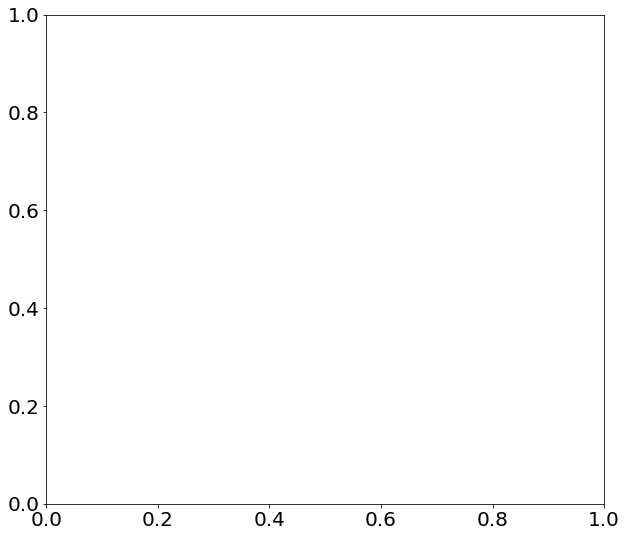

In [29]:
fig, ax = plt.subplots()    
sr, sr_em, sr_ep = prob_dist(starset_mm, 'radius', 'lk_new', start = 10.0, end = 12, size = 0.02, ax = ax)
ax.set_xlabel(r'$R/R_{\odot}$')
ax.set_ylabel('Normalized likelihood')
ax.set_title('Radius estimates for KOI 3886')
plt.savefig(dr + 'Estimate_R.pdf')

fig, ax = plt.subplots()    
slum, slum_em, slum_ep = prob_dist(starset_mm, 'luminosity', 'lk_new', start = 45, end = 70, size = 0.2, ax = ax)
ax.set_xlabel(r'$L/L_{\odot}$')
ax.set_ylabel('Normalized likelihood')
ax.set_title('Luminosity estimates for KOI 3886')
plt.savefig(dr + 'Estimate_L.pdf')


fig, ax = plt.subplots()    
slogg, slogg_em, slogg_ep = prob_dist(starset_mm, 'log_g', 'lk_new', start = 2.54, end = 2.62, size = 0.0005, ax = ax)
ax.set_xlabel(r'$\log g$')
ax.set_ylabel('Normalized likelihood')
ax.set_title(r'$\log g$ estimates for KOI 3886')
plt.savefig(dr + 'Estimate_logg.pdf')

fig, ax = plt.subplots()    
sy, sy_em, sy_ep = prob_dist(starset_mm, 'initial_Yinit', 'lk_new', start = 0.235, end = 0.325, size = 0.01, ax = ax)
ax.set_xlabel(r'$Y_{\rm init}$')
ax.set_ylabel('Normalized likelihood')
ax.set_title(r'$Y_{\rm init}$ estimates KOI 3886')
plt.savefig(dr + 'Estimate_Y.pdf')

fig, ax = plt.subplots()    
smlt, smlt_em, smlt_ep = prob_dist(starset_mm, 'initial_MLT', 'lk_new', start = 1.65, end = 2.35, size = 0.1, ax = ax)
ax.set_xlabel(r'$\alpha_{\rm MLT}$')
ax.set_ylabel('Normalized likelihood')
ax.set_title(r'$\alpha_{\rm MLT}$ estimates for KOI 3886')
plt.savefig(dr + 'Estimate_MLT.pdf')

In [30]:
a = np.array([sr, sr_em, sr_ep, smass, smass_em, smass_ep, 0.0,0.0,0.0,slum, slum_em, slum_ep, sage,sage_em,sage_ep, slogg, slogg_em, slogg_ep])
np.set_printoptions(precision=5,suppress=True)
print(a)

NameError: name 'sr' is not defined

/Users/litz/Documents/GitHub/model_KIC9773821/S3_mixed_modes/m2.24Y0.32FeH0.0MLT2.1ov0.018000000000000002dif0/profile869.data.GYRE.osc1
star_mass          2.23897
star_age         -0.231316
effective_T        5193.72
log_g              2.93082
star_feh       0.000150061
Name: 2510, dtype: object


KeyError: "None of [Index(['E_0_1', 'E_0_2', 'E_0_3', 'E_0_4', 'E_0_5', 'E_0_6', 'E_0_7', 'E_0_8',\n       'E_0_9', 'E_0_10', 'E_0_11', 'E_0_12', 'E_0_13', 'E_0_14', 'E_0_15',\n       'E_0_16', 'E_0_17', 'E_0_18', 'E_0_19', 'E_0_20', 'E_0_21', 'E_0_22',\n       'E_0_23', 'E_0_24', 'E_0_25', 'E_0_26', 'E_0_27', 'E_0_28', 'E_0_29',\n       'E_0_30', 'E_0_31', 'E_0_32', 'E_0_33', 'E_0_34', 'E_0_35', 'E_0_36',\n       'E_0_37', 'E_0_38', 'E_0_39', 'E_0_40'],\n      dtype='object')] are in the [index]"

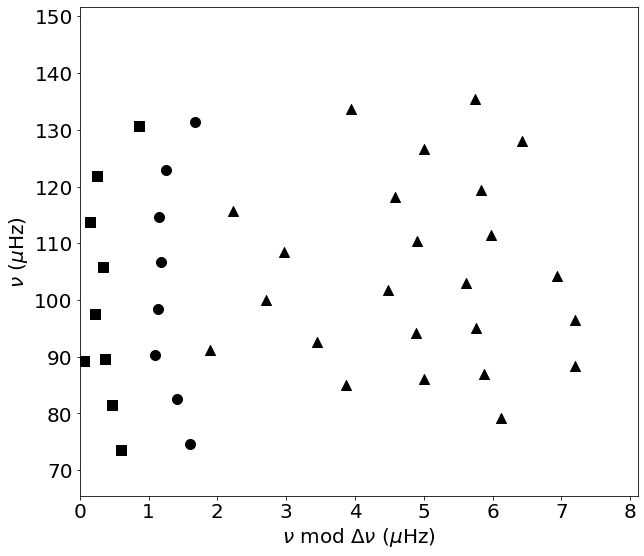

In [31]:
plt.scatter((obs_nu0 % obs_delta_nu), obs_nu0, c = 'k',marker='o',s = 100)
plt.scatter((obs_nu1 % obs_delta_nu), obs_nu1, c = 'k',marker='^',s = 100)
plt.scatter((obs_nu2 % obs_delta_nu), obs_nu2, c = 'k',marker='s',s = 100)

#plt.scatter((obs_nu9 % obs_delta_nu), obs_nu9, c = 'g',marker='*')


plt.xlim([0.0, obs_delta_nu])
plt.ylim([np.min(obs_nu)-obs_delta_nu,np.max(obs_nu)+2*obs_delta_nu])
plt.xlabel(r'$\nu$ mod $\Delta\nu$ ($\mu$Hz)')
plt.ylabel(r'$\nu$ ($\mu$Hz)')
#plt.title('Top 3 models for KOI 3386)')

t = 0
for index, row in starset_mm.iterrows():
    osc1file = dr + mddr + row['csvname'] + '/' + row['filename'] + '.data.GYRE.osc1'
    if (row['lk_new'] >= 0.9):
        if row['evol_stage'] == 2: color = 'r'
        if row['evol_stage'] == 3: color = 'b'
        t = t+1
        
        print(osc1file)
        print(row[['star_mass', 'star_age','effective_T', 'log_g', 'star_feh']])
        
        model_nu0 = row[output_freq_header].to_numpy()
        model_E0 = row[output_E_header].to_numpy()
                
        sl, snp, snu, sE = np.loadtxt(osc1file, skiprows=6, usecols=(0,1,4,6), unpack=True)
        id1 = (sl == 1)
        id2 = (sl == 2)
        
        model_p1 = snp[id1]
        model_nu1 = snu[id1]
        model_E1 = sE[id1]
        
        model_p2= snp[id2]
        model_nu2 = snu[id2]
        model_E2 = sE[id2]
        
        
        ######## only fit the most p-like modes ###
        
        #np1 = np.unique(model_p1)
        #mm_nu1 = np1*0.00
        #mm_E1 = np1*0.00
        #for j in range(len(np1)):
        #    nuse = (model_p1 == np1[j])
        #    nplike = model_E1[nuse].argmin()
        #    mm_nu1[j] = model_nu1[nuse][nplike]
        #    mm_E1[j] = model_E1[nuse][nplike]
                
        #np2 = np.unique(model_p2)
        #mm_nu2 = np2*0.00
        #mm_E2 = np2*0.00
        #for j in range(len(np2)):
        #    nuse = (model_p2 == np2[j])
        #    nplike = model_E2[nuse].argmin()
        #    mm_nu2[j] = model_nu2[nuse][nplike]
        #    mm_E2[j] = model_E2[nuse][nplike]
        
        #model_p1 = np1
        #model_nu1 = mm_nu1
        #model_E1 = mm_E1
        
        #model_p2= np2
        #model_nu2 = mm_nu2
        #model_E2 = mm_E2
        
        ##### end of only fit the most p-like modes###
        
        find_nu0, find_E0, lk0 = fit_two_sets(obs_nu0, obs_nu0_e, model_nu0, model_nu0)
        find_nu1, find_E1, lk1 = fit_two_sets(obs_nu1, obs_nu1_e, model_nu1, model_E1)
        find_nu2, find_E2, lk2 = fit_two_sets(obs_nu2, obs_nu2_e, model_nu2, model_E2)
        
        find_nu0_c = ball_two_term((find_nu0, find_nu0/1.6/obs_nu_max, find_E0), row['surf_a1'], row['surf_a3'])
        find_nu1_c = ball_two_term((find_nu1,find_nu1/1.6/obs_nu_max, find_E1 ), row['surf_a1'], row['surf_a3'])
        find_nu2_c = ball_two_term((find_nu2,find_nu2/1.6/obs_nu_max, find_E2 ), row['surf_a1'], row['surf_a3'])

        plt.scatter((find_nu0_c  % obs_delta_nu), find_nu0_c, facecolors='none', edgecolors= color ,marker='o', s = 100)
        plt.scatter((find_nu1  % obs_delta_nu), find_nu1, facecolors='none', edgecolors= color ,marker='^', s = 100)
        plt.scatter((find_nu2  % obs_delta_nu), find_nu2, facecolors='none', edgecolors= color ,marker='s', s = 100)
plt.scatter(0,0,c = 'k',marker='o',s = 100,label = 'Observed Freq.')
plt.scatter(0,0 , facecolors='none', edgecolors= 'r' ,marker='o',s = 100,label = 'Model Freq.')
plt.legend(loc = 'upper left', fontsize = 20,fancybox = False,shadow = False,frameon = False)
plt.savefig(dr + 'best_models_on_echelle.pdf')

t

2

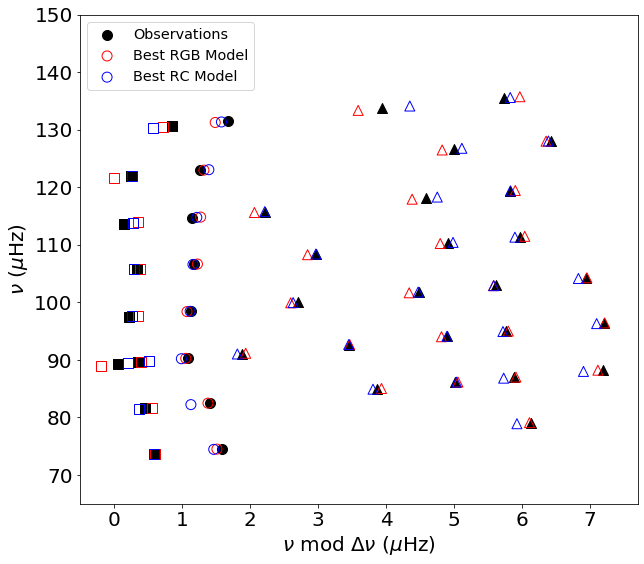

In [34]:
plt.scatter((obs_nu0 % obs_delta_nu), obs_nu0, c = 'k',marker='o',s = 100)
plt.scatter((obs_nu1 % obs_delta_nu), obs_nu1, c = 'k',marker='^',s = 100)
plt.scatter((obs_nu2 % obs_delta_nu), obs_nu2, c = 'k',marker='s',s = 100)

#plt.scatter((obs_nu9 % obs_delta_nu), obs_nu9, c = 'g',marker='*')


plt.xlim([0.0, obs_delta_nu])
plt.ylim([np.min(obs_nu)-obs_delta_nu,np.max(obs_nu)+obs_delta_nu])
plt.xlabel(r'$\nu$ mod $\Delta\nu$ ($\mu$Hz)')
plt.ylabel(r'$\nu$ ($\mu$Hz)')
plt.ylim([65, 150])
plt.xlim([-0.5, 7.7])

t = 0
for index, row in starset_mm.iterrows():
    
    if not ((np.abs(row['lk_new'] - 0.553)<0.001) or (row['lk_new'] == 1.0)): continue
    
    osc1file = dr + mddr + 'S3_mixed_modes/'+ row['csvname'] + '/' + row['filename'] + '.data.GYRE.osc1'
    osc2file = dr + mddr + 'S3_mixed_modes_l2/'+ row['csvname'] + '/' + row['filename'] + '.data.GYRE.osc1'
    if ((os.path.isfile(osc1file)) & (os.path.isfile(osc2file))):
        t = t + 1
        
        model_nu0 = row[output_freq_header]
        
        sl, snp, snu, sE = np.loadtxt(osc1file, skiprows=6, usecols=(0,1,4,6), unpack=True)
        id1 = (sl == 1)
        
        
        model_p1 = snp[id1]
        model_nu1 = snu[id1]
        model_E1 = sE[id1]
        
        
        sl, snp, snu, sE = np.loadtxt(osc2file, skiprows=6, usecols=(0,1,4,6), unpack=True)
        id2 = (sl == 2)
        model_p2= snp[id2]
        model_nu2 = snu[id2]
        model_E2 = sE[id2]
        
        
        ######## only fit the most p-like modes ###
        
        #np1 = np.unique(model_p1)
        #mm_nu1 = np1*0.00
        #mm_E1 = np1*0.00
        #for j in range(len(np1)):
        #    nuse = (model_p1 == np1[j])
        #    nplike = model_E1[nuse].argmin()
        #    mm_nu1[j] = model_nu1[nuse][nplike]
        #    mm_E1[j] = model_E1[nuse][nplike]
                
        #np2 = np.unique(model_p2)
        #mm_nu2 = np2*0.00
        #mm_E2 = np2*0.00
        #for j in range(len(np2)):
        #    nuse = (model_p2 == np2[j])
        #    nplike = model_E2[nuse].argmin()
        #    mm_nu2[j] = model_nu2[nuse][nplike]
        #    mm_E2[j] = model_E2[nuse][nplike]
        
        #model_p1 = np1
        #model_nu1 = mm_nu1
        #model_E1 = mm_E1
        
        #model_p2= np2
        #model_nu2 = mm_nu2
        #model_E2 = mm_E2
        
        ##### end of only fit the most p-like modes###
        
        if row['evol_stage'] ==2: 
            color = 'r'
        else:
            color = 'b'
        
        find_nu0, find_E0, lk0 = fit_two_sets(obs_nu0, obs_nu0_e, model_nu0, model_nu0)
        find_nu1, find_E1, lk1 = fit_two_sets(obs_nu1, obs_nu1_e, model_nu1, model_E1)
        find_nu2, find_E2, lk2 = fit_two_sets(obs_nu2, obs_nu2_e, model_nu2, model_E2)
        
        surf_a1, surf_a3, find_nu0_c = surface_correction(obs_nu0, obs_nu0_e, find_nu0 , None, all_nu_max, 'kb95')

        #find_nu0_c = ball_two_term((find_nu0, find_nu0/1.6/obs_nu_max, find_E0), row['surf_a1'], row['surf_a3'])
        find_nu1_c = ball_two_term((find_nu1,find_nu1/1.6/obs_nu_max, find_E1 ), row['surf_a1'], row['surf_a3'])
        find_nu2_c = ball_two_term((find_nu2,find_nu2/1.6/obs_nu_max, find_E2 ), row['surf_a1'], row['surf_a3'])

        plt.scatter((find_nu0_c  % obs_delta_nu), find_nu0_c, facecolors='none', edgecolors= color ,marker='o', s = 100)
        plt.scatter((find_nu1_c  % obs_delta_nu), find_nu1_c, facecolors='none', edgecolors= color ,marker='^', s = 100)
        plt.scatter((find_nu2_c  % obs_delta_nu), find_nu2_c, facecolors='none', edgecolors= color ,marker='s', s = 100)
        plt.scatter(((find_nu2_c  % obs_delta_nu) - obs_delta_nu), find_nu2_c, facecolors='none', edgecolors= color ,marker='s', s = 100)


plt.scatter(0,0,c = 'k',marker='o',s = 100,label = 'Observations')
plt.scatter(0,0 , facecolors='none', edgecolors= 'r' ,marker='o',s = 100,label = 'Best RGB Model')
plt.scatter(0,0 , facecolors='none', edgecolors= 'B' ,marker='o',s = 100,label = 'Best RC Model')
plt.legend(loc = 'upper left')
plt.savefig(dr + 'i3_best_models_on_echelle.pdf')

t

In [ ]:
cc = ['lk_new','evol_stage','star_mass', 'star_age','effective_T', 'log_g', 'star_feh' ,'radius','luminosity', 'delta_Pg']#,'lk_l0','lk_l1']
aa = starset_mm[cc][starset_mm['lk_new']>=0.2]
aa['star_age'] = aa['star_age']
aa = np.round(aa,3)
aa.star_age = 10**aa.star_age
aa.sort_values(by=['lk_new'], inplace=True, ascending=False)

In [436]:
rc = aa[aa.evol_stage == 3]
rc.lk_new = rc.lk_new/np.max(rc.lk_new)
rc

,lk_new,evol_stage,star_mass,star_age,effective_T,log_g,star_feh,radius,luminosity,delta_Pg
4023,1.000000,3,2.051,1.169499,5083.719,2.920,0.115,8.226,40.606,197.765
1719,0.801085,3,2.053,1.104079,5140.141,2.920,-0.084,8.221,42.389,197.422
1580,0.703436,3,2.171,1.076465,5033.334,2.926,0.117,8.395,40.635,193.054
1482,0.636528,3,1.993,1.116863,5086.118,2.916,-0.184,8.141,39.849,193.829
2171,0.477396,3,2.009,1.177606,5131.943,2.914,0.114,8.193,41.826,193.037


In [414]:
print(aa.to_latex(index=False))

\begin{tabular}{rrrrrrrrrr}
\toprule
 lk\_new &  evol\_stage &  star\_mass &  star\_age &  effective\_T &  log\_g &  star\_feh &  radius &  luminosity &  delta\_Pg \\
\midrule
  1.000 &           2 &      2.239 &  0.587489 &     5193.717 &  2.931 &     0.000 &   8.483 &      47.045 &   196.160 \\
  0.877 &           2 &      2.259 &  0.665273 &     5150.701 &  2.929 &    -0.300 &   8.543 &      46.155 &   195.964 \\
  0.850 &           2 &      2.219 &  0.687068 &     5042.358 &  2.926 &     0.000 &   8.496 &      41.925 &   195.745 \\
  0.795 &           2 &      2.299 &  0.599791 &     5230.482 &  2.932 &    -0.200 &   8.586 &      49.576 &   195.759 \\
  0.666 &           2 &      2.259 &  0.559758 &     5265.165 &  2.927 &    -0.200 &   8.561 &      50.599 &   195.963 \\
  0.651 &           2 &      2.339 &  0.555904 &     5251.005 &  2.934 &     0.100 &   8.637 &      50.951 &   195.515 \\
  0.553 &           3 &      2.051 &  1.169499 &     5083.719 &  2.920 &     0.115 &   8.226

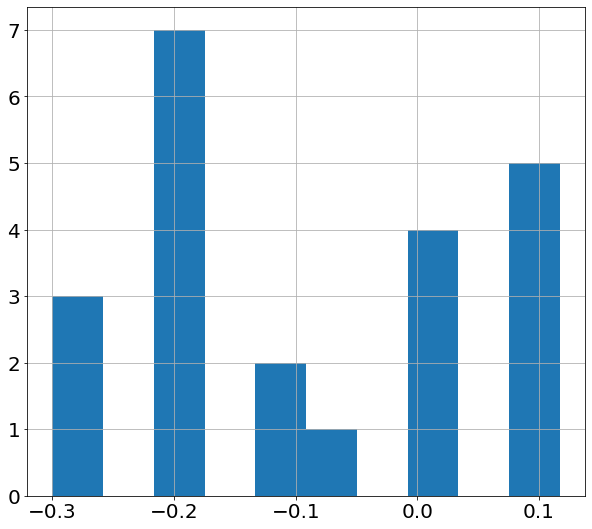

In [412]:
aa.star_feh.hist()

([array([3.99568811, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 6.00431189]),
  array([4.80193237, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 5.19806763])],
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <a list of 2 Lists of Patches objects>)

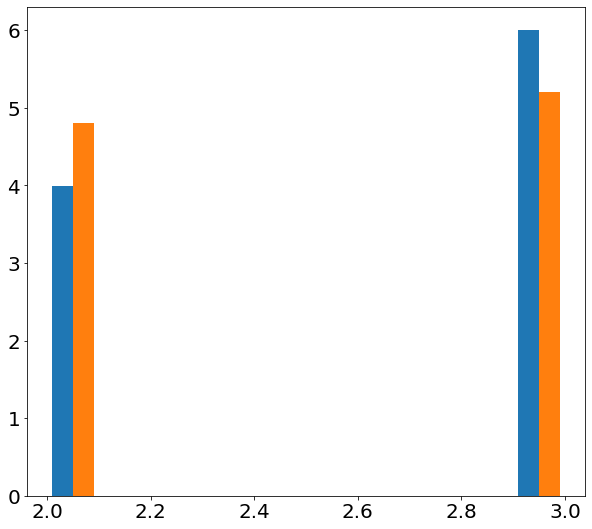

In [403]:
plt.hist([df.evol_stage,starset_mm.evol_stage], density=True)